In [1]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests
from ast import literal_eval
import glob
import datetime

# project_csv 6 

# project_csv

In [2]:
project_csv = pd.read_csv('../data/Hot-Stuff.csv')
project_csv

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


# genre csv

In [3]:
genre_csvs = pd.concat([pd.read_csv(x)for x in glob.glob('../genre_csvs/*.csv')], ignore_index = True)

In [4]:
genre_csvs = genre_csvs.dropna()
genre_csvs 

,0,1,2,3,4
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
5,Kris Allen,44.0,Kris Allen,spotify:artist:2zwHaEmXxX6DTv4i8ajNCM,"['acoustic pop', 'idol', 'neo mellow', 'post-t..."
6,The Swon Brothers,33.0,The Swon Brothers,spotify:artist:1nf0nRF0W4ybnJdda00pKY,"['contemporary country', 'country pop', 'oklah..."
...,...,...,...,...,...
10053,Judson Spence,4.0,Judson Spence,spotify:artist:2iDXfUayTfaawalL8HDDj6,[]
10055,Mongo Santamaria Orch.,46.0,Mongo Santamaria,spotify:artist:2oVwztjpHpJlAvlVVuqVa0,"['afro-cuban percussion', 'boogaloo', 'cuban r..."
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"


In [5]:
genre_csvs.columns = ['Performer', 'Artist_Popularity', 'Performer2', 'uri', 'Genre' ]

# song csv

In [6]:
merged_df = genre_csvs.merge(project_csv, how = 'inner', on = ['Performer'])
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,11/26/2005,66,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,NaN,66,1
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/3/2005,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/10/2005,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/17/2005,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/24/2005,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254925,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/7/1961,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2
254926,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/14/1961,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3
254927,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/21/1961,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4
254928,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/28/1961,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5


In [7]:
merged_df1 = pd.concat([pd.read_csv(x)for x in glob.glob('../csvs_6/*.csv')], ignore_index = True)
merged_df1

,0,1,2,3,4,5
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963
28386,NaN,NaN,NaN,NaN,NaN,NaN
28387,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_df1.columns = ['Explicit', 'Artist_Popularity', 'Performer', 'Song', 'Duration ms', 'uri' ]

In [9]:
merged_df = merged_df.merge(merged_df1, how = 'inner', on = ['Performer'])
merged_df

,Performer,Artist_Popularity_x,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Artist_Popularity_y,Song_y,Duration ms,uri_y
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,11/26/2005,66,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,NaN,66,1,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/3/2005,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/10/2005,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/17/2005,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/24/2005,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793540,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,84,Yellow Hearts,Yellow HeartsAnt Saunders,1,90.0,81,4,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2793541,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/21/2019,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,84.0,81,5,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2793542,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/28/2019,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,6,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2793543,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,1/4/2020,94,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,7,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl


In [10]:
merged_df['WeekID'] = pd.to_datetime(merged_df['WeekID'])

In [11]:
merged_df = merged_df.sort_values('WeekID')

In [12]:
merged_df = merged_df.drop_duplicates(subset = 'uri_x', keep='first')
merged_df

,Performer,Artist_Popularity_x,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Artist_Popularity_y,Song_y,Duration ms,uri_y
2502672,Perry Como,72.0,Perry Como,spotify:artist:5v8jlSmAQfrkTjAlpUfWtu,"['adult standards', 'easy listening']",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,37,Moon Talk,Moon TalkPerry Como,1,NaN,37,1,False,3.0,Mandolins In The Moonlight,164866.0,spotify:track:3XuWiQ11ih3fF4ICGTvKgb
936657,Dean Martin,78.0,Dean Martin,spotify:artist:49e4v89VmlDcFCMyDv9wQ9,"['adult standards', 'easy listening', 'lounge']",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,68,Volare (Nel Blu Dipinto Di Blu),Volare (Nel Blu Dipinto Di Blu)Dean Martin,1,NaN,68,1,False,29.0,In the Chapel in the Moonlight,152346.0,spotify:track:1RknXtekvGbn57eru2vXjd
1439144,The Playmates,20.0,The Playmates,spotify:artist:1bpcq3dBWR6ykfx2Sod8Fy,['novelty'],http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,70,Don't Go Home,Don't Go HomeThe Playmates,1,NaN,70,1,False,34.0,Beep Beep,150213.0,spotify:track:4kbV9t3FO8op15IrpQm5Mz
878409,Pat Boone,53.0,Pat Boone,spotify:artist:7fmKtIgmxqNEKjATioVNsu,"['adult standards', 'easy listening', 'lounge'...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,39,That's How Much I Love You,That's How Much I Love YouPat Boone,1,NaN,39,1,False,7.0,Johnny Will,145946.0,spotify:track:6F7dr44klyiVBzf2SM599j
1778889,Sam Cooke,69.0,Sam Cooke,spotify:artist:6hnWRPzGGKiapVX1UCdEAC,"['adult standards', 'classic soul', 'rock-and-...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,74,Win Your Love For Me,Win Your Love For MeSam Cooke,1,NaN,74,1,False,32.0,Sugar Dumpling,136680.0,spotify:track:22lVNnkNGhMuC8MRPAF0YF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105554,Kali Uchis,82.0,Kali Uchis,spotify:artist:1U1el3k54VvEUzo3ybLPlM,"['colombian pop', 'pop']",https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,54,Telepatia,TelepatiaKali Uchis,1,NaN,54,1,False,81.0,telepatía,160191.0,spotify:track:6tDDoYIxWvMLTdKpjFkc1B
2792121,Mooski,47.0,Mooski,spotify:artist:4NqH3V7GS0Igs1VyGMXEi8,['alabama rap'],https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,99,Track Star,Track StarMooski,1,NaN,99,1,True,60.0,Track Star,199706.0,spotify:track:5hChuUMe5iHfjkXgzj1D4b
2771733,Duncan Laurence,70.0,Duncan Laurence,spotify:artist:3klZnJvYGIbWritVwQD434,['dutch pop'],https://www.billboard.com/charts/hot-100/2021-...,2021-04-17,100,Arcade,ArcadeDuncan Laurence,1,NaN,100,1,False,78.0,Arcade,183624.0,spotify:track:1Xi84slp6FryDSCbzq4UCD
2787495,Lainey Wilson,73.0,Lainey Wilson,spotify:artist:6tPHARSq45lQ8BSALCfkFC,['contemporary country'],https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,94,Things A Man Oughta Know,Things A Man Oughta KnowLainey Wilson,1,NaN,94,1,False,71.0,Things A Man Oughta Know,203373.0,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf


In [13]:
merged_df['Year'] = merged_df['WeekID'].dt.year
merged_df

,Performer,Artist_Popularity_x,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Artist_Popularity_y,Song_y,Duration ms,uri_y,Year
2502672,Perry Como,72.0,Perry Como,spotify:artist:5v8jlSmAQfrkTjAlpUfWtu,"['adult standards', 'easy listening']",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,37,Moon Talk,Moon TalkPerry Como,1,NaN,37,1,False,3.0,Mandolins In The Moonlight,164866.0,spotify:track:3XuWiQ11ih3fF4ICGTvKgb,1958
936657,Dean Martin,78.0,Dean Martin,spotify:artist:49e4v89VmlDcFCMyDv9wQ9,"['adult standards', 'easy listening', 'lounge']",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,68,Volare (Nel Blu Dipinto Di Blu),Volare (Nel Blu Dipinto Di Blu)Dean Martin,1,NaN,68,1,False,29.0,In the Chapel in the Moonlight,152346.0,spotify:track:1RknXtekvGbn57eru2vXjd,1958
1439144,The Playmates,20.0,The Playmates,spotify:artist:1bpcq3dBWR6ykfx2Sod8Fy,['novelty'],http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,70,Don't Go Home,Don't Go HomeThe Playmates,1,NaN,70,1,False,34.0,Beep Beep,150213.0,spotify:track:4kbV9t3FO8op15IrpQm5Mz,1958
878409,Pat Boone,53.0,Pat Boone,spotify:artist:7fmKtIgmxqNEKjATioVNsu,"['adult standards', 'easy listening', 'lounge'...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,39,That's How Much I Love You,That's How Much I Love YouPat Boone,1,NaN,39,1,False,7.0,Johnny Will,145946.0,spotify:track:6F7dr44klyiVBzf2SM599j,1958
1778889,Sam Cooke,69.0,Sam Cooke,spotify:artist:6hnWRPzGGKiapVX1UCdEAC,"['adult standards', 'classic soul', 'rock-and-...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,74,Win Your Love For Me,Win Your Love For MeSam Cooke,1,NaN,74,1,False,32.0,Sugar Dumpling,136680.0,spotify:track:22lVNnkNGhMuC8MRPAF0YF,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105554,Kali Uchis,82.0,Kali Uchis,spotify:artist:1U1el3k54VvEUzo3ybLPlM,"['colombian pop', 'pop']",https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,54,Telepatia,TelepatiaKali Uchis,1,NaN,54,1,False,81.0,telepatía,160191.0,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,2021
2792121,Mooski,47.0,Mooski,spotify:artist:4NqH3V7GS0Igs1VyGMXEi8,['alabama rap'],https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,99,Track Star,Track StarMooski,1,NaN,99,1,True,60.0,Track Star,199706.0,spotify:track:5hChuUMe5iHfjkXgzj1D4b,2021
2771733,Duncan Laurence,70.0,Duncan Laurence,spotify:artist:3klZnJvYGIbWritVwQD434,['dutch pop'],https://www.billboard.com/charts/hot-100/2021-...,2021-04-17,100,Arcade,ArcadeDuncan Laurence,1,NaN,100,1,False,78.0,Arcade,183624.0,spotify:track:1Xi84slp6FryDSCbzq4UCD,2021
2787495,Lainey Wilson,73.0,Lainey Wilson,spotify:artist:6tPHARSq45lQ8BSALCfkFC,['contemporary country'],https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,94,Things A Man Oughta Know,Things A Man Oughta KnowLainey Wilson,1,NaN,94,1,False,71.0,Things A Man Oughta Know,203373.0,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,2021


In [14]:
merged_df['Year'] = pd.to_numeric(merged_df['Year'])


In [15]:
merged_df['Genre'] = merged_df['Genre'].apply(literal_eval)
merged_df

,Performer,Artist_Popularity_x,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Artist_Popularity_y,Song_y,Duration ms,uri_y,Year
2502672,Perry Como,72.0,Perry Como,spotify:artist:5v8jlSmAQfrkTjAlpUfWtu,"[adult standards, easy listening]",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,37,Moon Talk,Moon TalkPerry Como,1,NaN,37,1,False,3.0,Mandolins In The Moonlight,164866.0,spotify:track:3XuWiQ11ih3fF4ICGTvKgb,1958
936657,Dean Martin,78.0,Dean Martin,spotify:artist:49e4v89VmlDcFCMyDv9wQ9,"[adult standards, easy listening, lounge]",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,68,Volare (Nel Blu Dipinto Di Blu),Volare (Nel Blu Dipinto Di Blu)Dean Martin,1,NaN,68,1,False,29.0,In the Chapel in the Moonlight,152346.0,spotify:track:1RknXtekvGbn57eru2vXjd,1958
1439144,The Playmates,20.0,The Playmates,spotify:artist:1bpcq3dBWR6ykfx2Sod8Fy,[novelty],http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,70,Don't Go Home,Don't Go HomeThe Playmates,1,NaN,70,1,False,34.0,Beep Beep,150213.0,spotify:track:4kbV9t3FO8op15IrpQm5Mz,1958
878409,Pat Boone,53.0,Pat Boone,spotify:artist:7fmKtIgmxqNEKjATioVNsu,"[adult standards, easy listening, lounge, rock...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,39,That's How Much I Love You,That's How Much I Love YouPat Boone,1,NaN,39,1,False,7.0,Johnny Will,145946.0,spotify:track:6F7dr44klyiVBzf2SM599j,1958
1778889,Sam Cooke,69.0,Sam Cooke,spotify:artist:6hnWRPzGGKiapVX1UCdEAC,"[adult standards, classic soul, rock-and-roll,...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,74,Win Your Love For Me,Win Your Love For MeSam Cooke,1,NaN,74,1,False,32.0,Sugar Dumpling,136680.0,spotify:track:22lVNnkNGhMuC8MRPAF0YF,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105554,Kali Uchis,82.0,Kali Uchis,spotify:artist:1U1el3k54VvEUzo3ybLPlM,"[colombian pop, pop]",https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,54,Telepatia,TelepatiaKali Uchis,1,NaN,54,1,False,81.0,telepatía,160191.0,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,2021
2792121,Mooski,47.0,Mooski,spotify:artist:4NqH3V7GS0Igs1VyGMXEi8,[alabama rap],https://www.billboard.com/charts/hot-100/2021-...,2021-03-06,99,Track Star,Track StarMooski,1,NaN,99,1,True,60.0,Track Star,199706.0,spotify:track:5hChuUMe5iHfjkXgzj1D4b,2021
2771733,Duncan Laurence,70.0,Duncan Laurence,spotify:artist:3klZnJvYGIbWritVwQD434,[dutch pop],https://www.billboard.com/charts/hot-100/2021-...,2021-04-17,100,Arcade,ArcadeDuncan Laurence,1,NaN,100,1,False,78.0,Arcade,183624.0,spotify:track:1Xi84slp6FryDSCbzq4UCD,2021
2787495,Lainey Wilson,73.0,Lainey Wilson,spotify:artist:6tPHARSq45lQ8BSALCfkFC,[contemporary country],https://www.billboard.com/charts/hot-100/2021-...,2021-05-29,94,Things A Man Oughta Know,Things A Man Oughta KnowLainey Wilson,1,NaN,94,1,False,71.0,Things A Man Oughta Know,203373.0,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,2021


In [16]:
merged_df1 = merged_df.to_csv('big_1000.csv', encoding = 'utf-8', index= False)
merged_df1

# Top Songs Genre Graph

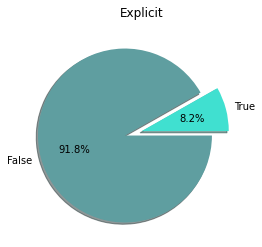

In [17]:
explicit_count = merged_df['Explicit'].value_counts()
explicit_count 
values = explicit_count.tolist()
colors = ['cadetblue', 'turquoise']
labels = ['False', 'True']
explode = (0.2, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Explicit')
plt.show()

# explicit popularity

# Popularity vs duration

In [18]:
merged_df.head()

,Performer,Artist_Popularity_x,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Artist_Popularity_y,Song_y,Duration ms,uri_y,Year
2502672,Perry Como,72.0,Perry Como,spotify:artist:5v8jlSmAQfrkTjAlpUfWtu,"[adult standards, easy listening]",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,37,Moon Talk,Moon TalkPerry Como,1,NaN,37,1,False,3.0,Mandolins In The Moonlight,164866.0,spotify:track:3XuWiQ11ih3fF4ICGTvKgb,1958
936657,Dean Martin,78.0,Dean Martin,spotify:artist:49e4v89VmlDcFCMyDv9wQ9,"[adult standards, easy listening, lounge]",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,68,Volare (Nel Blu Dipinto Di Blu),Volare (Nel Blu Dipinto Di Blu)Dean Martin,1,NaN,68,1,False,29.0,In the Chapel in the Moonlight,152346.0,spotify:track:1RknXtekvGbn57eru2vXjd,1958
1439144,The Playmates,20.0,The Playmates,spotify:artist:1bpcq3dBWR6ykfx2Sod8Fy,[novelty],http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,70,Don't Go Home,Don't Go HomeThe Playmates,1,NaN,70,1,False,34.0,Beep Beep,150213.0,spotify:track:4kbV9t3FO8op15IrpQm5Mz,1958
878409,Pat Boone,53.0,Pat Boone,spotify:artist:7fmKtIgmxqNEKjATioVNsu,"[adult standards, easy listening, lounge, rock...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,39,That's How Much I Love You,That's How Much I Love YouPat Boone,1,NaN,39,1,False,7.0,Johnny Will,145946.0,spotify:track:6F7dr44klyiVBzf2SM599j,1958
1778889,Sam Cooke,69.0,Sam Cooke,spotify:artist:6hnWRPzGGKiapVX1UCdEAC,"[adult standards, classic soul, rock-and-roll,...",http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,74,Win Your Love For Me,Win Your Love For MeSam Cooke,1,NaN,74,1,False,32.0,Sugar Dumpling,136680.0,spotify:track:22lVNnkNGhMuC8MRPAF0YF,1958


KeyError: 'Duration s'

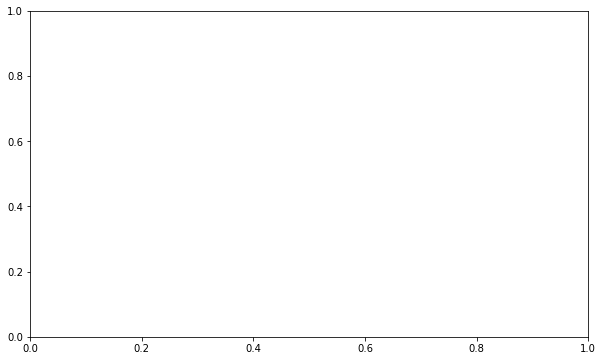

In [19]:
genre_graph_100 = merged_df.plot(figsize=(10,6),
                             x= 'Duration s',
                             y= 'Artist_Popularity',
                             title = 'Song Popularity vs Duration',
                             xlabel = 'Popularity',
                             ylabel = 'Duration ms',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.1)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.show()

# release date popularity

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Year',
                             y= 'Artist_Popularity',
                             title = 'Top  Songs Release Date vs Popularity',
                             xlabel = 'Popularity',
                             ylabel = '',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
merged_df.loc[merged_df ['Year'] < 1960].loc[merged_df['Artist_Popularity'] >= 75]

In [ ]:
merged_df = merged_df.reset_index(drop = True)

In [ ]:
merged_df.loc[merged_df ['Year'] > 2010].loc[merged_df['Artist_Popularity'] <= 10]

# explicit Popularity

In [ ]:
sns.boxplot(data=merged_df,x = 'Explicit', y ='Artist_Popularity')
plt.title('Explicit vs Popularity')
plt.ylabel('Popularity');

In [ ]:
plt.title

# duration explicit

In [ ]:
sns.boxplot(data=merged_df, x= 'Explicit', y = 'Duration s');
plt.title('Explicit vs Duration')
plt.ylabel('Duration');

# release date genre

In [ ]:
merged_df['Genre'] = merged_df['Genre'].apply(literal_eval)

In [ ]:
merged_df.explode(column = 'Genre')

In [ ]:
genre_df = merged_df.explode(column = 'Genre')


In [ ]:
genre_df[genre_df['Year'] >= 2010]['Genre'].value_counts()

In [ ]:
genre_graph_100 = genre_df.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Year',
                             title = 'Genre vs Year',
                             xlabel = 'Song_Popularity',
                             ylabel = 'Year',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Weeks on Chart',
                             y= 'Artist_Popularity',
                             title = 'Weeks on Chart vs Popularity',
                             xlabel = 'Weeks on Chart',
                             ylabel = 'Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Peak Position',
                             y= 'Artist_Popularity',
                             title = 'Peak Position vs Popularity',
                             xlabel = 'Weeks on Chart',
                             ylabel = 'Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Duration s',
                             y= 'Artist_Popularity',
                             title = 'Duration vs Popularity',
                             xlabel = 'Weeks on Chart',
                             ylabel = 'Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);